# Pymaceuticals Inc.
---

### Analysis

- (Observation 1): Because the correlation value between mouse weight and average tumor volume is 0.84, we can assume that a positive correlation exists between mouse weight and tumor volume. 
(Observation 2): Mice treated with Ramicane displayed, on average, the lowest tumor volume recordings at the end of the study. This could infer that Ramicane is the most effect of the treatment drugs. 
(Observation 3): Over the course of the study, Mouse s185 experienced negative linear regression in its reduction of tumor volume. This is to say that over time exposed to the treatment drug Camomulin, Mouse s185 experienced a steady reduction of tumor volume. 

 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_merge = pd.merge(mouse_metadata, study_results, how="left", on =["Mouse ID"])

# Display the data table for preview
data_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
# Checking the number of mice. (--the number of unique Mouse ID)
len(data_merge["Mouse ID"].unique())

249

In [91]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_merge[data_merge.duplicated(['Mouse ID', 'Timepoint'])]
len(duplicate)


5

In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate
show_duplicates = data_merge[data_merge.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
Name: count, dtype: int64

In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean = data_merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
# Checking the number of mice in the clean DataFrame.
# New number of rows / Numver of unique Mouse IDs 
print(len(data_clean))
print(len(data_clean["Mouse ID"].unique()))

1888
249


## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # Group by regimen
drug_regimen = data_clean.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = drug_regimen["Tumor Volume (mm3)"].mean()
median_tumor = drug_regimen["Tumor Volume (mm3)"].median()
variance_tumor = drug_regimen["Tumor Volume (mm3)"].var()
std_tumor = drug_regimen["Tumor Volume (mm3)"].std()
SEM_tumor = drug_regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_tumor = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor, 
    "Variance Tumor Volume": variance_tumor,
    "Standard Deviation Tumor Volume": std_tumor,
    "SEM Tumor Volume": SEM_tumor
})
summary_tumor


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_tumor_agg = drug_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_tumor_agg = summary_tumor_agg.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Variance Tumor Volume", "std": "Standard Dev Tumor Volume","sem": "SEM Tumor Volume"})
summary_tumor_agg

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Treated')

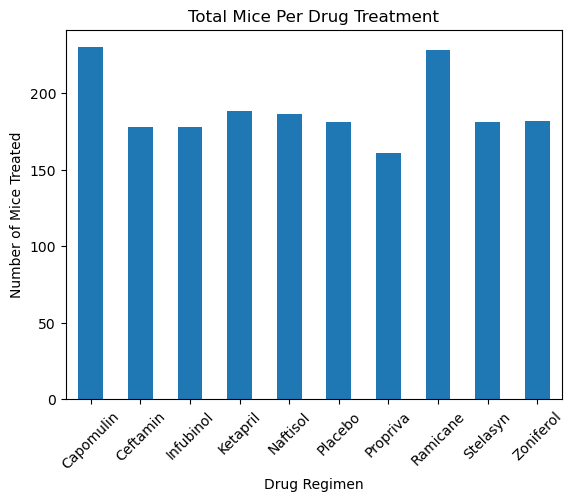

In [97]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_vs_timepoints = data_merge.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_mice_vs_timepoint = mice_vs_timepoints.plot.bar(x='Drug Regimen', y='Mouse ID', rot=45)
plt.title("Total Mice Per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")

<function matplotlib.pyplot.show(close=None, block=None)>

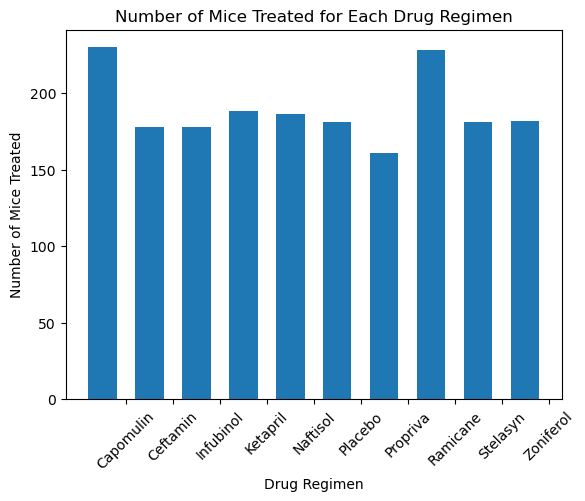

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = np.arange(len(mice_vs_timepoints))
yaxis = mice_vs_timepoints
plt.bar(xaxis,yaxis,width=0.6,align="center")
ticks = [value+0.5 for value in xaxis]
plt.xticks(ticks, mice_vs_timepoints.index.values, rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")
plt.title("Number of Mice Treated for Each Drug Regimen")
plt.show

<Axes: title={'center': 'Distribution of Sexes Among Mice Treated'}>

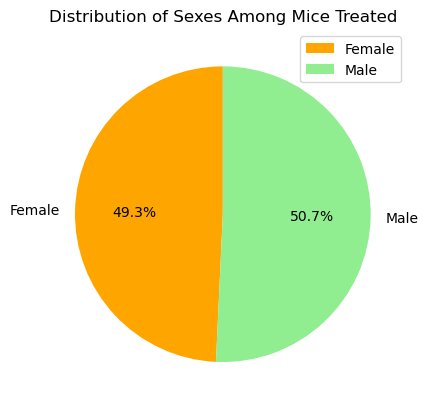

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = data_clean.groupby(["Sex"]).count()
mice_gender
pie_mice_gender = mice_gender.plot.pie(y="Mouse ID", title=("Distribution of Sexes Among Mice Treated"), colors=["orange","lightgreen"],startangle=90,autopct='%1.1f%%')
pie_mice_gender.set_ylabel("")
pie_mice_gender

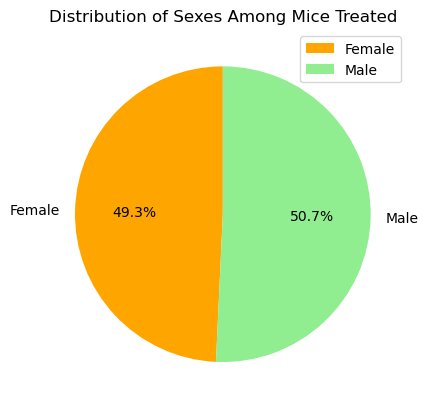

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender
labels = ["Female", "Male"]
colors = ["orange", "lightgreen"]
plt.pie(mice_gender["Mouse ID"], labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title("Distribution of Sexes Among Mice Treated")
plt.legend(labels, loc="best")

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Group by Mouse ID and Final Timepoint
final_tumor_vol = data_merge.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor_vol
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_merge = pd.merge(final_tumor_vol, data_merge, on=(["Mouse ID", "Timepoint"]))
final_tumor_vol_merge


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Run loc for each time each drug is counted + tumor volumes that correlate
    tumor_volume = final_tumor_vol_merge.loc[final_tumor_vol_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # Add subset 
    tumor_vol_data.append(tumor_volume)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Print Results
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


([<matplotlib.axis.XTick at 0x2657ab26980>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

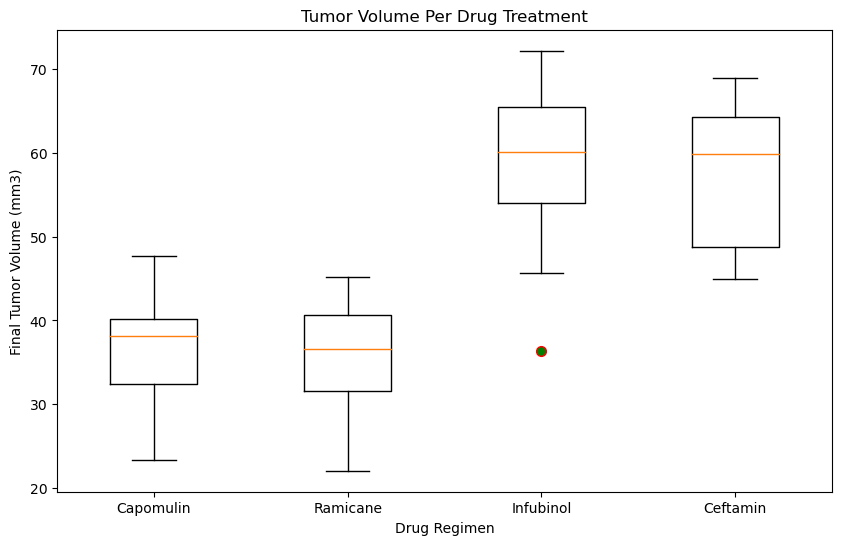

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots(figsize=(10,6))
# Create custom marker
flierprops = dict(marker='o', markerfacecolor='g', markersize=7,
                  linestyle='none', markeredgecolor='r')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
# Set axes labels
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
# Set label ticks
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

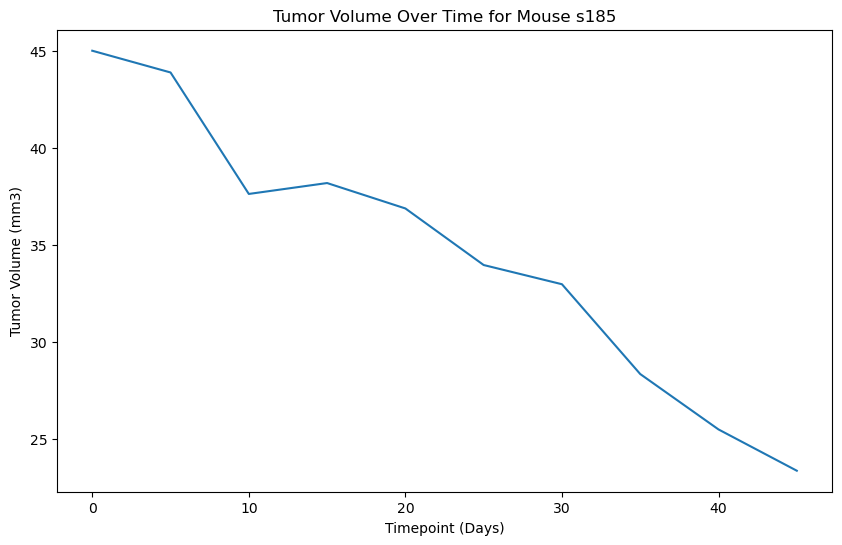

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Isolate Capomulin treatment data 
# View data to choose a mouse (s185)
capomulin_treat = data_clean.loc[data_clean["Drug Regimen"] == "Capomulin"]
capomulin_treat.value_counts("Mouse ID")
# Choose Mouse s185, isolate its data
s185 = data_clean.loc[data_clean["Mouse ID"] == "s185"]
s185
fig1,ax1 = plt.subplots(figsize=(10,6))
# Create and name the x & y axes
capomulin_xaxis = s185["Timepoint"]
capomulin_yaxis = s185["Tumor Volume (mm3)"]
plt.plot(capomulin_xaxis, capomulin_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse s185")
plt.show()

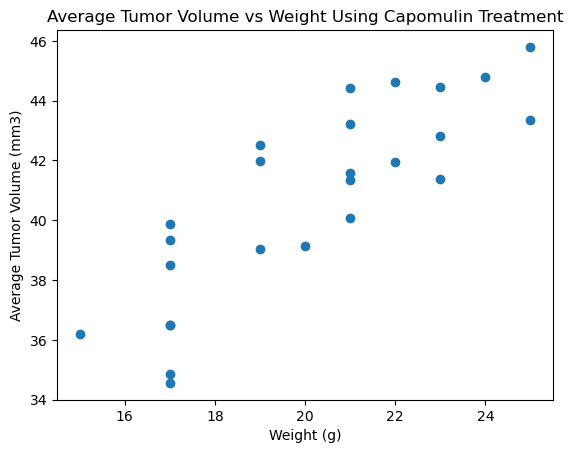

In [105]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Get the average volumes from the grouped data
avg_capomulin_weight = capomulin_treat.groupby(["Mouse ID"]).mean(numeric_only=True)
plt.scatter(avg_capomulin_weight['Weight (g)'], avg_capomulin_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.841936342469472
y = 0.95x + 21.55


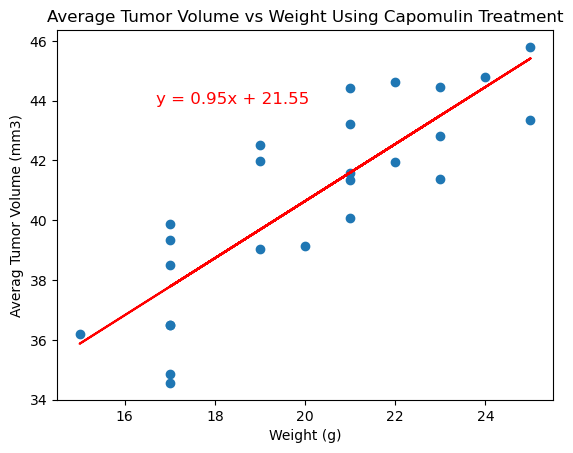

In [106]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Find the correlation coefficient & print it out
corr_coef = st.pearsonr(avg_capomulin_weight['Weight (g)'], avg_capomulin_weight['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {corr_coef}")

# Make the scatter plot
plt.scatter(avg_capomulin_weight['Weight (g)'],avg_capomulin_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

# Create variables for linear regression 
linreg_x_values = avg_capomulin_weight['Weight (g)']
linreg_y_values = avg_capomulin_weight['Tumor Volume (mm3)']

# Develop equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(linreg_x_values, linreg_y_values)
linregress_values = linreg_x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

# Add the equation & line onto plot
plt.annotate(equation, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=12,color="red")
plt.plot(linreg_x_values,linregress_values,"r-")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
plt.show()